# Information Theory Measures w/ RBIG

In [2]:
import sys

# MacOS
sys.path.insert(0, '/Users/eman/Documents/code_projects/rbig/')
sys.path.insert(0, '/home/emmanuel/code/py_packages/py_rbig/src')

# ERC server
sys.path.insert(0, '/home/emmanuel/code/rbig/')


import numpy as np
import warnings
from time import time
from rbig.rbig import RBIG
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

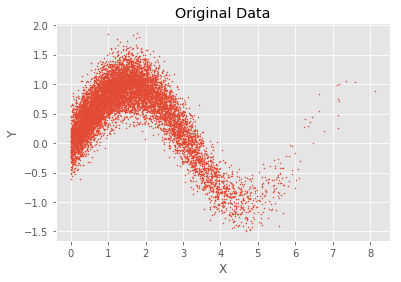

In [3]:
seed = 123
rng = np.random.RandomState(seed=seed)

num_samples = 10000
x = np.abs(2 * rng.randn(1, num_samples))
y = np.sin(x) + 0.25 * rng.randn(1, num_samples)
data = np.vstack((x, y)).T

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original Data')
plt.show()

### RBIG Fitting

In [4]:
n_layers = 50
rotation_type = 'PCA'
random_state = 123

# Initialize RBIG class
rbig_model = RBIG(n_layers=n_layers, rotation_type=rotation_type, random_state=random_state)

# fit model to the data
rbig_model.fit(data);

### Total Correlation

Mutual Information = sum MultiInformation

In [5]:
mutual_information = rbig_model.residual_info
tc_rbig = mutual_information.sum()
print(f'Total Correlation: {tc_rbig:.3f}')
print(f'Total Correlation: {rbig_model.total_correlation():.3f}')

Total Correlation: 0.871
Total Correlation: 0.871


### Entropy

Total Entropy = Multidimensional Individual Entropy -  Total Correlation

In [6]:
print(f"Entropy: {rbig_model.entropy():.3f}")

Entropy: 13.769
